In [3]:
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import shock_1d
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt

In [4]:
# set up numerical solution
N = 64
p = 3

solver = EulerSolver(
    w0=shock_1d(),
    bc=BoundaryCondition(x="free"),
    gamma=1.4,
    nx=N,
    px=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-5,
)

# run simulation
solver.rkorder(0.245)

100%|██████████| 0.245/0.245 [00:00]               


Text(0, 0.5, '$\\rho$')

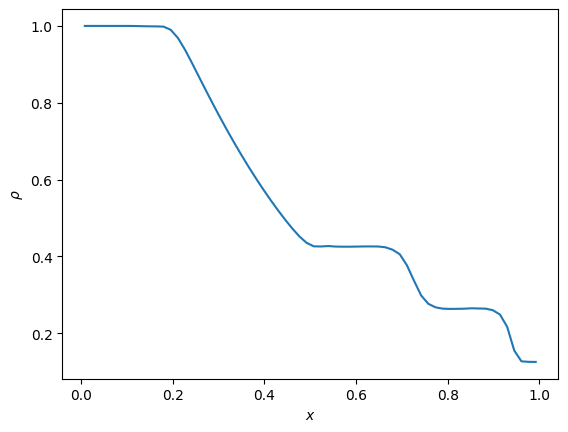

In [5]:
fig, ax = plt.subplots()
solver.plot_1d_slice(ax, param="rho", y=0.5, z=0.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\rho$")